<a href="https://colab.research.google.com/github/sumeyra123/Python-Artificial-Intelligence-Projects-for-Beginners/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bu not defteri için bazı veri seti gereksinimleri bulunmaktadır. Bu linkteki veri setlerini indirip çalışma zamanına dosya olarak eklemeniz gerekmektedir. Dosyaları çalışma zamanına yükledikten sonra not defteri üzerinde rahatça çalışabilirsiniz. İyi Çalışmalar..**

[Veri Setleri](https://drive.google.com/file/d/1qRMp-kn8LQrnxOBoLtvBksOVXlxLD9ij/view?usp=sharing)

Eğer veriniz kötüyse makine öğrenmesi araçlarınız kullanışsız olacaktır.

Özellik mühendisliği, değişken mühendisliği kapsamında ham veriden çıkarılabilecek birçok olası yeni özellik de söz konusu olacağından sadece iyi veriyle ilgilenmiyoruz. Aslında potansiyel veri ile de ilgileniyoruz.

Elimizde ciddi miktarlarda ya da türlerde veriler var ve bu verileri bizim işleyebiliyor olmamız ve kullanabiliyor olmamız lazım. Veri işlemek, veriden değer üretmek gibi söylemlerin ortaya çıkması ne olacak? Bunlar özellik mühendisliği ve veri ön işleme gibi işlemlerle ortaya çıkıyor olacak.

- Outliers (Aykırı Değerler)
- Missing Values (Eksik Değerler)
- Encoding
- Feature Scaling (Özellik Ölçeklendirme)
- Feature Extraction (Özellik Çıkarımı)
- Feature Interactions (Özellik Etkileşimleri)

gibi konuları ele alacağız.

**Özellik Mühendisliği:** Özellikler üzerinde gerçekleştirilen çalışmalar. Ham veriden değişken üretmek.

**Veri Ön İşleme:** Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.

# **Outliers (Aykırı Değerler)**

Verideki genel eğilimin oldukça dışına çıkan değerlere aykırı değer denir.

Özellikle doğrusal problemlerde aykırı değerlerin etkileri daha şiddetlidir. Ağaç yöntemlerinde bu etkiler daha düşüktür oldukça düşüktür ama özetle aykırı değerler bizim için dikkat edilmesi gereken en azından göz önünde bulundurulması gereken değerlerdir.

*Aykırı değerler neye göre belirlenir?*

Kullanılabilecek birçok farklı yöntem vardır. Biz yaygınca tercih edilen boxplot yöntemini tek değişkenli olarak, çok değişkenli olarak ise LOF yöntemini birlikte değerlendiriyor olacağız.

IQR: Kabul edilebilir aralık.

   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1      0            113803 53.100  C123        S
4            5         0       3                           Allen, Mr. William Henry    male 35.000      0      0            373450  8.050   NaN        S


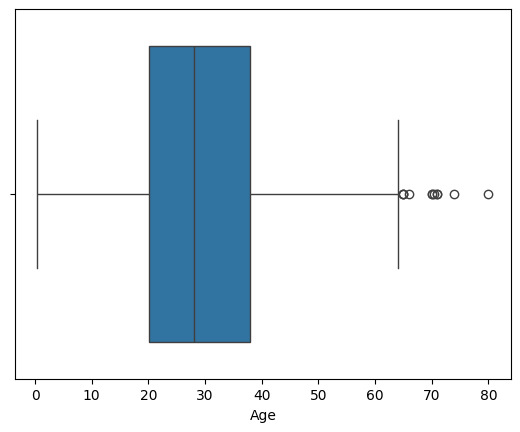

Q1: 20.125 
Q2: 28.0 
Q3: 38.0
IQR: 17.875
UP: 64.8125 
LOW: -6.6875


True

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
########################
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

def load_application_train():
  data = pd.read_csv("application_train.csv")
  return data

df = load_application_train()
df.head()

def load():
  data = pd.read_csv("titanic.csv")
  return data

df = load()
print(df.head())

##################### Aykırı Değerler #####################
sns.boxplot(x=df["Age"])
plt.show()

##################### Aykırı Değerler Nasıl Yakalanır? #####################

q1 = df["Age"].quantile(0.25)
q2 = df["Age"].quantile(0.50)
q3 = df["Age"].quantile(0.75)

print("Q1:", q1, "\nQ2:", q2, "\nQ3:", q3)

iqr = q3 - q1

print("IQR:", iqr)

up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

print("UP:", up, "\nLOW:", low)

df[(df["Age"] < low) | (df["Age"] > up)]

df[(df["Age"] < low) | (df["Age"] > up)].index

##################### Aykırı Değer Var mı Yok mu? #####################

df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)

# 1. Eşik değer belirledik.
# 2. Aykırılara eriştik.
# 3. Hızlıca aykırı değer var mı yok mu diye sorduk.

In [ ]:
##################### İşlemleri Fonksiyonlaştırma #####################
# Birbirimizi tekrar etmemek için fonksiyon yazmaya ihtiyacımız var. (DRY: Don't Repeat Yourself)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

def load():
  data = pd.read_csv("titanic.csv")
  return data

dff = load_application_train()
df = load()

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquartile_range
  low_limit = quartile1 - 1.5 * interquartile_range
  return low_limit, up_limit

low_limit, up_limit = outlier_thresholds(df, "Age")

outlier_thresholds(df, "Fare")

low_limit

def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
    return True
  else:
    return False

# Programatik yaklaşım önemlidir. Kod akışında bir daha ihtiyacımız olan bir işlem varsa bu işlemi fonksiyonlaştırmak zorundayız.

def grab_col_names(dataframe, cat_th=10, car_th=20):
  """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        Numerik fakat kategorik olan değişkenler için sınıf eşik değeri. (threshold)
    car_th: int, float
        Kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi.
    num_cols: list
        Numerik değişken listesi.
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi.

    Notes
    ------
    cat_cols + num_cols + cat_but_car = Toplam değişken sayısı.
    num_but_cat, cat_cols'un içerisinde.
    Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car
  """
  # cat_cols, cat_but_car
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtype) in ["category", "object", "bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["float", "int"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]
  # num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]
  # prints
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: : {len(cat_cols)}")
  print(f"num_cols: : {len(num_cols)}")
  print(f"cat_but_car: : {len(cat_but_car)}")
  print(f"num_but_cat: : {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(dataframe=df)

# Kardinalitesi (çok fazla sınıfa sahip olan kategorik değişkenler) yüksek değişkenler ölçüm değeri taşımaz.

num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
  print(col, check_outlier(df, col))

def grab_outliers(dataframe, col_name, index=False):
  low, up = outlier_thresholds(dataframe, col_name)
  if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
  else:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

  if index:
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index

#grab_outliers(df, "Age")
age_index = grab_outliers(df, "Age", True)

""" Yaptığımız işlemler

outlier_thresholds(df, "Age")
check_outlier(df, "Age")
grab_outliers(df, "Age", True)
"""

Observations: 891
Variables: 12
cat_cols: : 6
num_cols: : 3
cat_but_car: : 3
num_but_cat: : 4
Age True
Fare True
     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


' Yaptığımız işlemler\n\noutlier_thresholds(df, "Age")\ncheck_outlier(df, "Age")\ngrab_outliers(df, "Age", True)\n'

**Aykırı Değer Problemini Çözme**

In [ ]:
##################### SİLME #####################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

df = load()

low, up = outlier_thresholds(df, "Fare")
print(low, up)
print(df.shape)

df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

def remove_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  df_without_outliers = dataframe[~((dataframe["Fare"] < low) | (dataframe["Fare"] > up))]
  return df_without_outliers

#cat_cols, num_cols, cat_but_car = grab_col_names(df)

#num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
  new_df = remove_outlier(df, col)

df.shape[0] - new_df.shape[0]

##################### BASKILAMA (re-assignment with thresholds) #####################

low, up = outlier_thresholds(df, "Fare")

df.loc[(df["Fare"] > up), "Fare"] = up

df.loc[(df["Fare"] < low), "Fare"] = low

def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

df = load()
df.shape
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
  print(col, check_outlier(df, col))

for col in num_cols:
  replace_with_thresholds(df, col)

for col in num_cols:
  print(col, check_outlier(df, col))

"""
RECAP

outlier_thresholds(df, "Age")
check_outlier(df, "Age")
grab_outliers(df, "Age", True)

remove_outlier(df, "Age").shape()
replace_with_thresholds(df, "Age)
check_outlier(df, "Age)
"""

-26.724 65.6344
(891, 12)
Observations: 891
Variables: 12
cat_cols: : 6
num_cols: : 3
cat_but_car: : 3
num_but_cat: : 4
Age True
Fare True
Age False
Fare False


'\nRECAP\n\noutlier_thresholds(df, "Age")\ncheck_outlier(df, "Age")\ngrab_outliers(df, "Age", True)\n\nremove_outlier(df, "Age").shape()\nreplace_with_thresholds(df, "Age)\ncheck_outlier(df, "Age)\n'

**Çok Değişkenli Aykırı Değer Analizi: Local Outliar Factor**

Tek başına aykırı olamayacak bazı değerler birlikte ele alındığında bu durum aykırılık yaratıyor olabilir. Örnek verecek olursak yaş ve evlilik sayısı değişkenleri olsun. Evlilik sayısı için 3 olduğunu varsayalım. Evlilik sayısı için 3 değeri pek anormal görünmüyor, olabilir. Yaş değişkeninin değeri de 17 olsun. Bu değer yaş değişkeni için aykırı durmuyor, normal görünüyor. Fakat hem evlilik sayısı 3 hem de yaşın 17 olması durumunun aynı anda gerçekleştiğini düşünmek fazlasıyla anormal olacaktır. O yüzden bu iki değişken için verilen değerler aykırı değer olarak kabul edilebilir.

Bundan dolayı aykırı değerlere çok değişkenli olarak da bir bakmak faydalı olabilecek. Buna çok değişkenli etki denir.

***LOF yöntemi:*** Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanıma imkanı sağlar.

Yüz tane değişken bile olsa o yüz değişkenin taşıdığı bilginin büyük çoğunluğunu taşıdığını varsaydığımız iki bileşen aracılığıyla, iki boyut aracılığıyla bu veri temsil edilebilir. Bunu da PCA (temel bileşen analizi) yöntemiyle gerçekleştiririz.

In [ ]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [ ]:
low, up = outlier_thresholds(df, "carat")
df[(df["carat"] < low) | (df["carat"] > up)].shape

(1889, 7)

In [ ]:
low, up = outlier_thresholds(df, "depth")
df[(df["depth"] < low) | (df["depth"] > up)].shape

(2545, 7)

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
df_scores = clf.negative_outlier_factor_
#df_scores = -df_scores
df_scores

np.sort(df_scores)[0:5] # en kötü 5 gözlem

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

<Axes: >

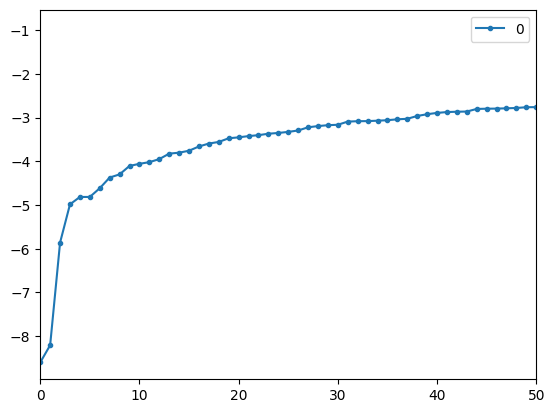

In [ ]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style=".-") # en büyük değişimin olduğu noktayı eşik değer olarak belirleyebiliriz.
# en kötü değerlerin olduğu sıralamaya göre 3. indeksteki değeri eşik değer olarak seçebiliriz.

In [ ]:
th = np.sort(df_scores)[3]
th

-4.984151747711709

In [ ]:
print(df[df_scores < th])
df[df_scores < th].shape

       carat  depth  table  price     x      y      z
41918  1.030 78.200 54.000   1262 5.720  5.590  4.420
48410  0.510 61.800 54.700   1970 5.120  5.150 31.800
49189  0.510 61.800 55.000   2075 5.150 31.800  5.120


(3, 7)

In [ ]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


In [ ]:
df[df_scores < th].drop(labels=df[df_scores < th].index, axis=0)
# Aykırı gözlem sayısı çok olduğunda baskılama yöntemini kullanmak mantıklı olmayacaktır. Gözlem sayısı az olduğunda çok değişkenli baktıktan sonra o aykırılık çıkarılmalı
# veri setinden.

# Ağaç yöntemleri kullanıyorsak aykırı değerlere hiç dokunmamayı tercih ediyoruz. Ama ben biraz takıntılıyım illa dokunmam, müdahale etmem lazım diyenler için de çok ucundan
# bir tıraşlamayı tercih edeceğiz. Çok ucundan 99'a 1'lik , 95'e 5'lik olarak IQR hesaplayacağız ve bu hesaplama üzerinden tıraşlayacağız. Çok ucundan dokunarak ilerleyeceğiz.
# 2 yorumumuz bu. Hiç dokunmamak ağaç yöntemlerinde ya da ağaç yöntemlerinde dokunacaksak çok ucundan dokunmak.

# Doğrusal yöntemleri kullanıyorsak aykırı değerlerin problemi bizim için tüm ciddiyetiyle devam ediyor olacak. Bu aykırı değerleri doldurmaktan ziyade az sayıdaysa silmek
# tercih edilebilir. Doldurmak yerine de tek değişkenli yaklaşıp baskılamak tercih edilebilir. Yine ucundan.

,carat,depth,table,price,x,y,z


# **Missing Values (Eksik Değerler)**

Gözlemlerde eksiklik olması durumunu ifade etmektedir.

Eksik değer probleminin çözümlerinde sahip olacağımız yaklaşımlar:
- Silme
- Değer Atama Yöntemleri (mod, medyan, ortalama ile doldurma)
- Tahmine Dayalı Yöntemler (istatistiksel hesaplamalara göre değer atama)

Eksik veri ile çalışırken göz önünde bulundurulması gereken önemli konulardan birisi: *Eksik verinin rassallığı*

Yani eksikliğin rastgele ortaya çıkıp çıkmadığı durumunun bilinmesi gerektiği.

_Eksik değere sahip gözlemlerin veri setinden direkt çıkarılması ve rassallığının incelenmemesi, yapılacak istatistiksel çıkarımların ve modelleme çalışmalarının güvenilirliğini düşürecektir. (Alpar, 2011)_

**Bir değişkendeki eksiklik başka bir değişken etkisinde (bağımlılığında) ortaya çıkmıştır denir. Eksiklikler rastgele değildir. Bu durumda silmek mantıklı değildir.(başka bir değişkenle arasındaki bağımlılık)**

In [ ]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df.isnull().values.any() # bütün veriye en genelinden eksiklik var mı sorgusu gerçekleştirdik.

True

In [ ]:
df.isnull().sum() # df.isnull().sum().sum() dersek tüm verideki toplam eksik değer sayısını verir.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.896,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.229,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.896,NaN,C


In [ ]:
df[df.isnull().any(axis=1)] # gözlem birimlerinden herhangi birinde hangi değişkende olduğu farketmeksizin boş değer varsa o gözlemleri
# döndürür.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [ ]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False) # Her bir değişkendeki eksikliğin tüm veriye göre yüzdelik oranı

,0
Cabin,77.104
Age,19.865
Embarked,0.224
PassengerId,0.000
Survived,0.000
Pclass,0.000
Name,0.000
Sex,0.000
SibSp,0.000
Parch,0.000


In [ ]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols # Sadece eksik değer içeren sütunları seçtik.

['Age', 'Cabin', 'Embarked']

In [ ]:
def missing_values_table(dataframe, na_name=False):
  na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
  n_miss = dataframe[na_cols].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_cols].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_cols

In [ ]:
missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


**Eksik Değer Problemini Çözme**

In [ ]:
######### Çözüm 1: Hızlıca Silmek ###########
df.dropna().shape # eksik değer içeren tüm gözlemleri siler.
# veri kaybı verinin büyüklüğüne göre çok fazla değilse silinebilir.

(183, 12)

In [ ]:
######### Çözüm 2: Basit Atama Yöntemleri ile Doldurmak ###########
df["Age"].fillna(df["Age"].mean()).isnull().sum()

0

In [ ]:
df["Age"].fillna(df["Age"].median()).isnull().sum() # Medyan ile doldurma

0

In [ ]:
df["Age"].fillna(0).isnull().sum() # Belli bir değerle doldurma

0

In [ ]:
dff = df.apply(lambda x: x.fillna(x.mean() if x.dtype != "O" else x), axis=0)

In [ ]:
dff.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0


In [ ]:
df.Embarked.fillna(df["Embarked"].mode()[0]).isnull().sum()

0

In [ ]:
df.apply(lambda x: x.mode()[0] if (x.dtypes == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# Kategorik değişkenlerdeki eksikliklere mode değerlerini atadık.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#################### Kategorik Değişken Kırılımında Değer Atama ####################
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Kadınlara kadınların yaş ortalamasını, erkeklere erkeklerin yaş ortalamasını atadık.
# .transform("mean") -> verileni ortalamalarla değiştir.

0

In [ ]:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

In [ ]:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Tahmine Dayalı Atama**

In [ ]:
#################### Çözüm 3: Tahmine Dayalı Atama ile Doldurma ####################
df = load()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()

Observations: 891
Variables: 12
cat_cols: : 6
num_cols: : 3
cat_but_car: : 3
num_but_cat: : 4


,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,True,False,True
1,1,1,1,0,38.000,71.283,False,False,False
2,1,3,0,0,26.000,7.925,False,False,True
3,1,1,1,0,35.000,53.100,False,False,True
4,0,3,0,0,35.000,8.050,True,False,True


In [ ]:
# değişkenlerin standartlaştırılması
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [ ]:
# knn'in uygulanması
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # En yakın 5 komşuluğa göre değişkenlerdeki boş değerleri doldurur. en yakınındaki 5 değerin ortalaması ile.
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [ ]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns) # Standartlaştırma işlemini geri alıp okunabilir değerlere geri çevirdik.
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,3.000,1.000,0.000,22.000,7.250,1.000,0.000,1.000
1,1.000,1.000,1.000,0.000,38.000,71.283,0.000,0.000,0.000
2,1.000,3.000,0.000,0.000,26.000,7.925,0.000,0.000,1.000
3,1.000,1.000,1.000,0.000,35.000,53.100,0.000,0.000,1.000
4,0.000,3.000,0.000,0.000,35.000,8.050,1.000,0.000,1.000


In [ ]:
# Doldurduğum değerleri görüp, takip etmek ve kıyaslamak istiyorum, o yüzden ilk dataframe'i kullanıyorum.
df["age_imputed_knn"] = dff[["Age"]]
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]
# Her bir boş değer için ayrı komşuluklarına göre değerler atadık.

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600
29,NaN,24.400
31,NaN,29.600
32,NaN,17.600
36,NaN,21.800
42,NaN,28.700


In [ ]:
#### RECAP ####
df = load()
# missing_table
missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [ ]:
# sayısal değişkenleri median ile doldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtypes != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtypes == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma

0

**Gelişmiş Analizler**

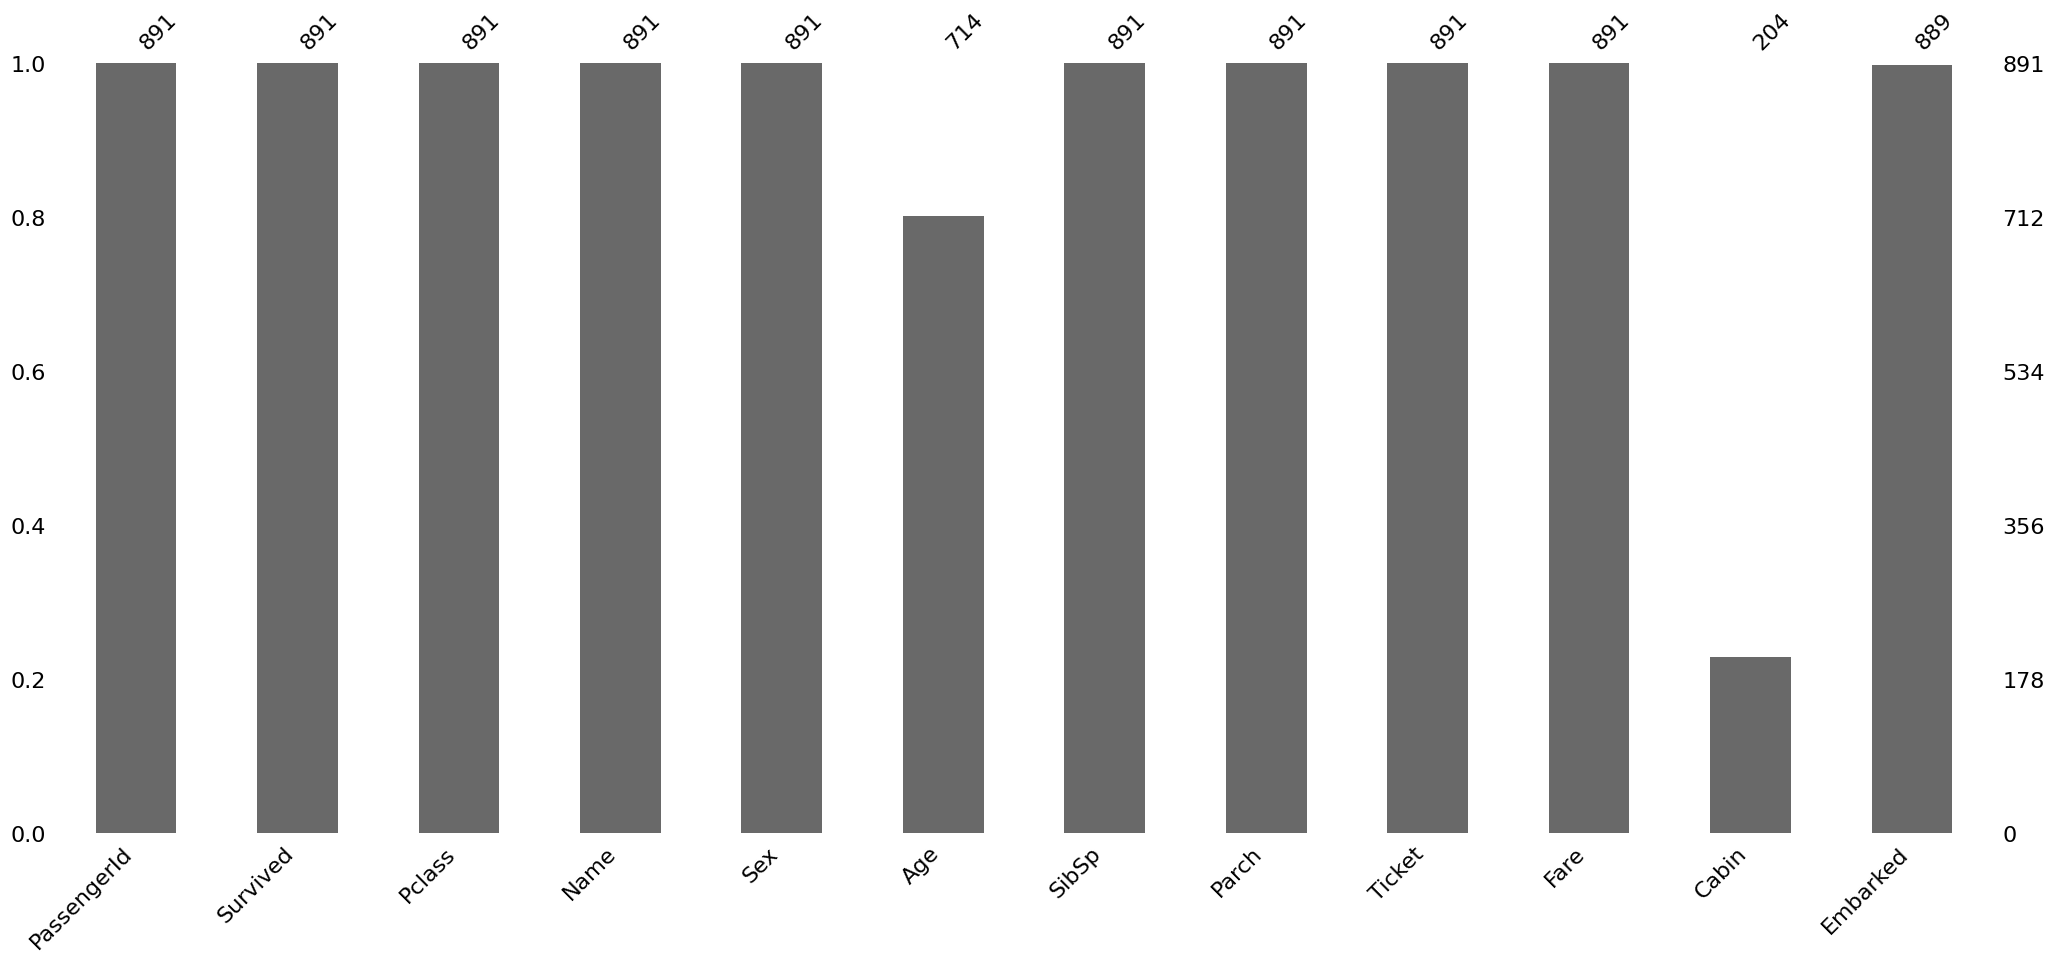

In [ ]:
msno.bar(df)
plt.show()

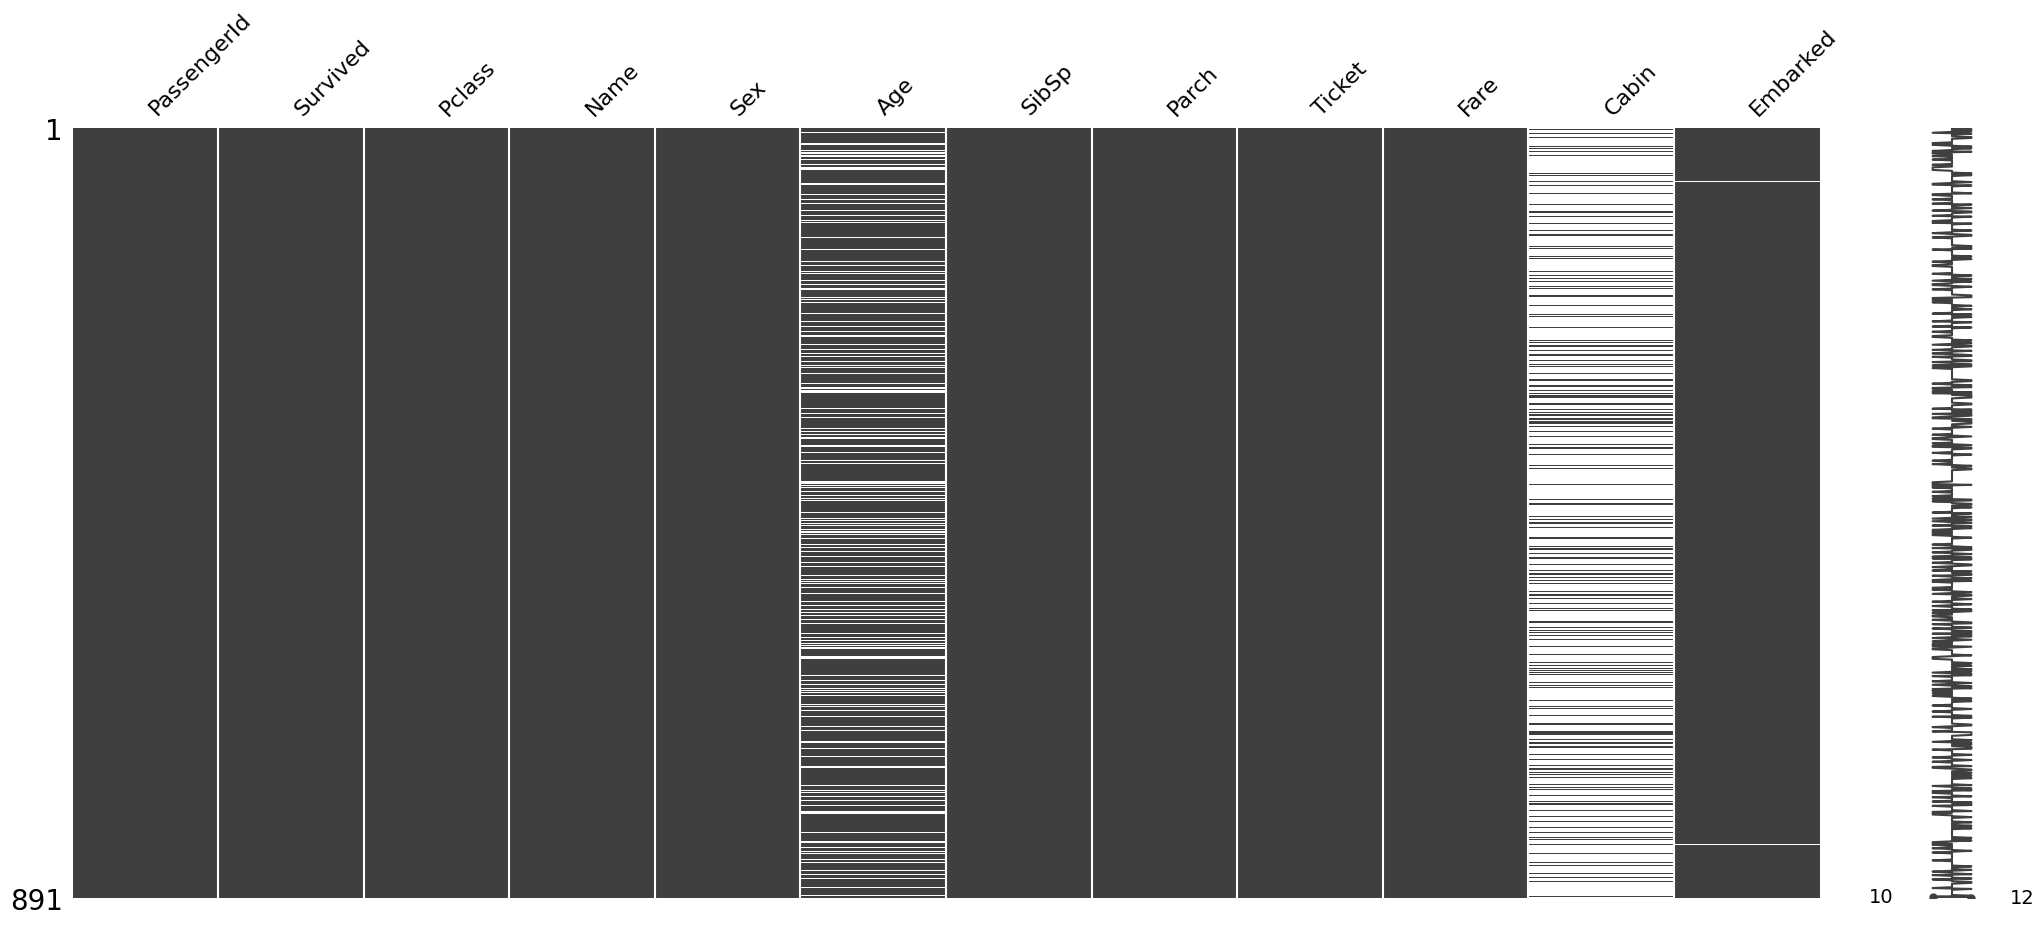

In [ ]:
msno.matrix(df)
plt.show()

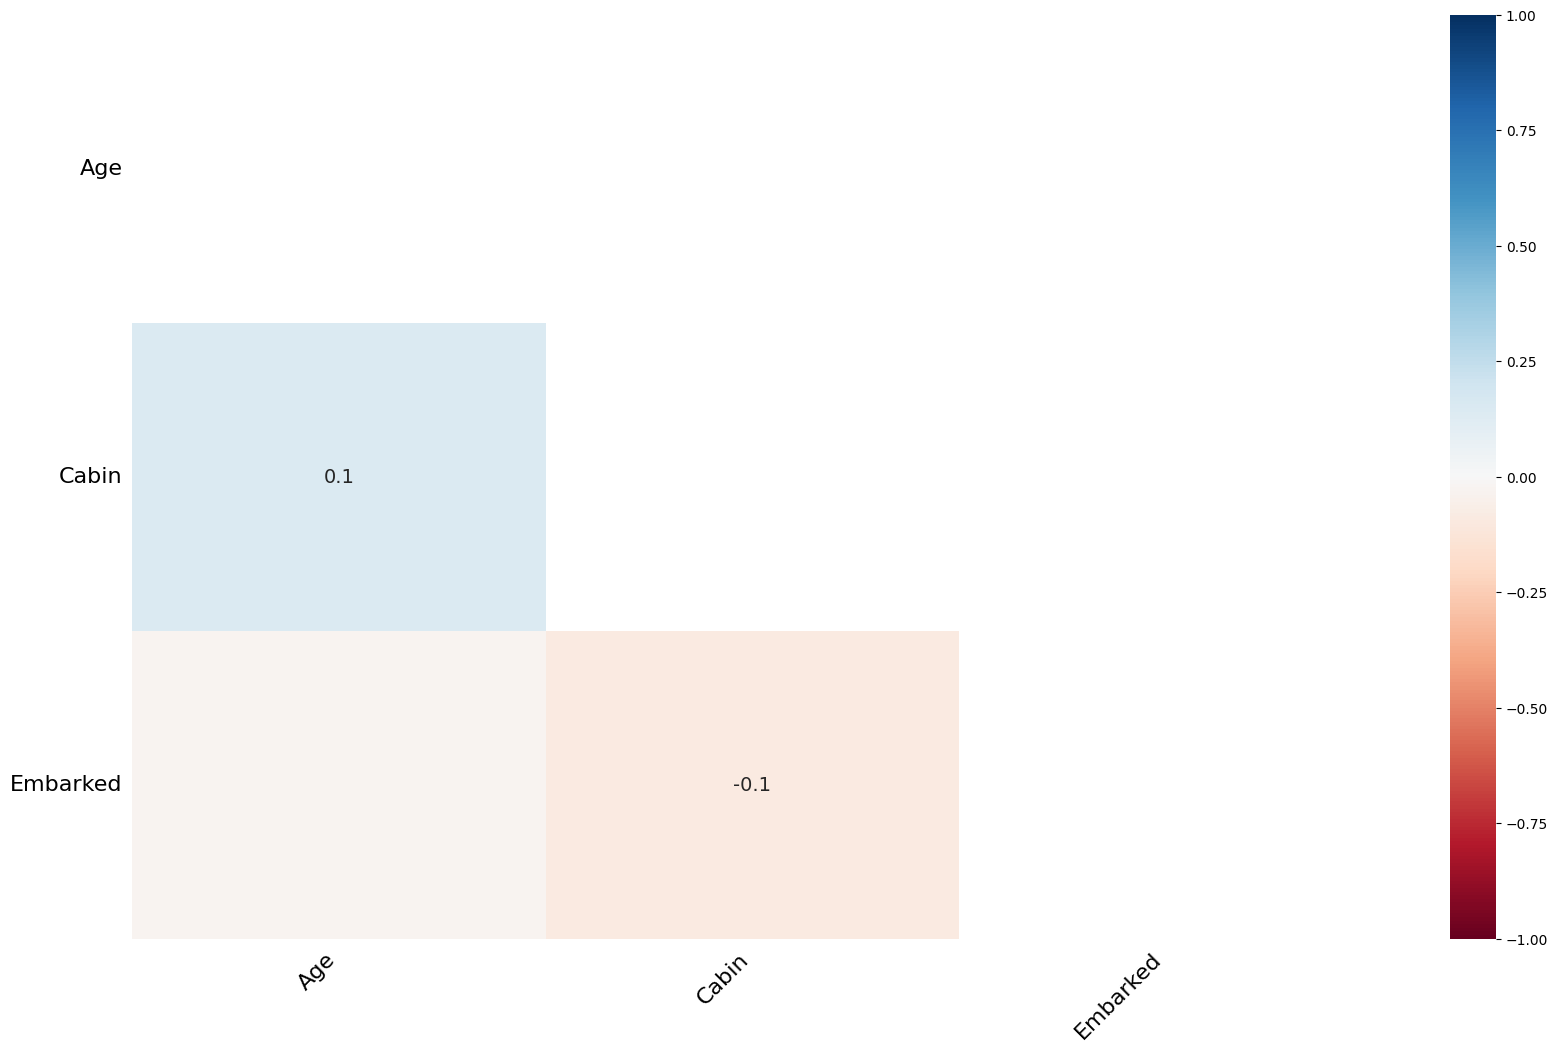

In [ ]:
msno.heatmap(df)
plt.show()
# Eksikliklerin korelasyonunu gösterir, yani eksiklikler rastgele mi yoksa birbirine bağımlı değişkenler arasındaki bir durumdan dolayı mı oluşuyor, bunu görmemize yardımcı olur.
# Değerin 1'e yaklaşması durumu kuvvetli ilişkiyi temsil eder. Pozitif yönlü kuvvetli ilişki olması durumunda değişkenlerdeki eksikliklerin birlikte ortaya çıktığı düşünülür.
# Yani birisinde eksiklik varken diğerinde de vardır, birisinde yokken diğerinde de yoktur.
# Negatif yönlü ise birisinde varken diğerinde yok, birisinde yokken diğerinde var şeklinde ters bir ilişki vardır.

**Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi**

In [ ]:
# Acaba eksikliklerin bağımlı değişken tarafında bir karşılığı var mıdır? Acaba bağımlı değişkenle ilişkisi olan bazı değişkenleri gözden mi kaçıracağım?
# gibi soruların yanıtlarını değerlendireceğiz.

na_cols = missing_values_table(df, True)
# Kabin bilgisi NA (eksik) olanların birçoğu gemi personeli, yolcular değil. Kabinde kalmıyorlar çünkü. Gemi personellerinin de hayatta kalma oranı daha yüksek bu yüzden.

def missing_vs_target(dataframe, target, na_columns):
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0) # Eksiklik olana 1, olmayana 0 yaz.
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns # _NA_ içeren değişken isimlerinin olduğu sütunları seç.
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        # NA flag olanları (eksik değerleri işaretleyen sütun) eksik veya değil olarak grupla ve target ortalamalarını al.
                        "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n") # Eksik ya da eksik olmayan değerlerin ilgili değişkene göre frekanslarını (sayılarını) al.


          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [ ]:
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




# **Encoding Scaling**

Encode etmek: Değişkenlerin temsil şekillerinin değiştirilmesi, yeniden kodlanması demektir.

Elimizde iki sınıflı bir kategorik değişken olduğunda bu iki sınıflı kategorik değişkenleri 0-1 şeklinde dönüştürmemiz gerekmektedir.

Bir kategorik değişken sıralı sınıflara sahipse (ordinalse) bu ordinal kategorik değişkenin sınıfları arasında bir fark vardır durumu bu değişkenin sayısal olarak temsil edildiği durumda da taşınmaktadır yani 0 küçük sınıfı 5 sınıfı temsil edebiliyorsa (education) "label encoderdan" 0-1-2-3-4-5 olarak kodlanarak geçirilebilir.  

**Label Encoding & Binary Encoding**

In [ ]:
df = load()
df.head()
df["Sex"].head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]

array([1, 0, 0, 0, 1])

In [ ]:
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [ ]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
df = load()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
  label_encoder(df, col)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
binary_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [ ]:
for col in binary_cols:
  label_encoder(df, col)

df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


**One Hot Encoding**

In [ ]:
df = load()
df.head()
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
pd.get_dummies(df, columns=["Embarked"], drop_first=True, dtype=int).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


In [ ]:
pd.get_dummies(df, columns=["Embarked"], drop_first=True, dummy_na=True, dtype=int).head() # dummy_na parametresi True olduğunda eksik değerler için de bir sınıf değişkeni oluşturur.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1,0


drop_first argümanı kukla değişken tuzağından kurtulabilmemiz için kullanılır. Ayrıca drop_first argümanının True olması aynı zamanda binary encode edilecek değişkenleri de label encoding'e gerek olmadan binary olarak encode eder.

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
  return dataframe

In [ ]:
df = load()
# cat_cols, num_cols, cat_but_car = grab_col_names(df)
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [ ]:
df = one_hot_encoder(df, ohe_cols)
df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Rare Encoding**

Gözlemler içerisinde bir kategorik değişkenin sınıflarından veri setinin büyüklüğüne göre gözlenme ihtimali en düşük (nadir) olan değişkenlerden kurtulmak modelleme aşamasında daha optimize çalışmamızı sağlar çünkü bu nadir görülen sınıf bizim açımızdan çok fazla bilgi taşımasa bile biz one hot encoding den geçirdiğimizde bu sınıf için sadece birkaç gözlemi 1 gözükeceğinden dolayı gereksiz bir değişken oluşturma işlemi yapmış oluruz.

Buradaki encoding yaklaşımımız nadir görülen sınıfları bir araya getirerek birlikte bir encoding işlemine sokmaktır. Buna Rare Encoding adı verilir.

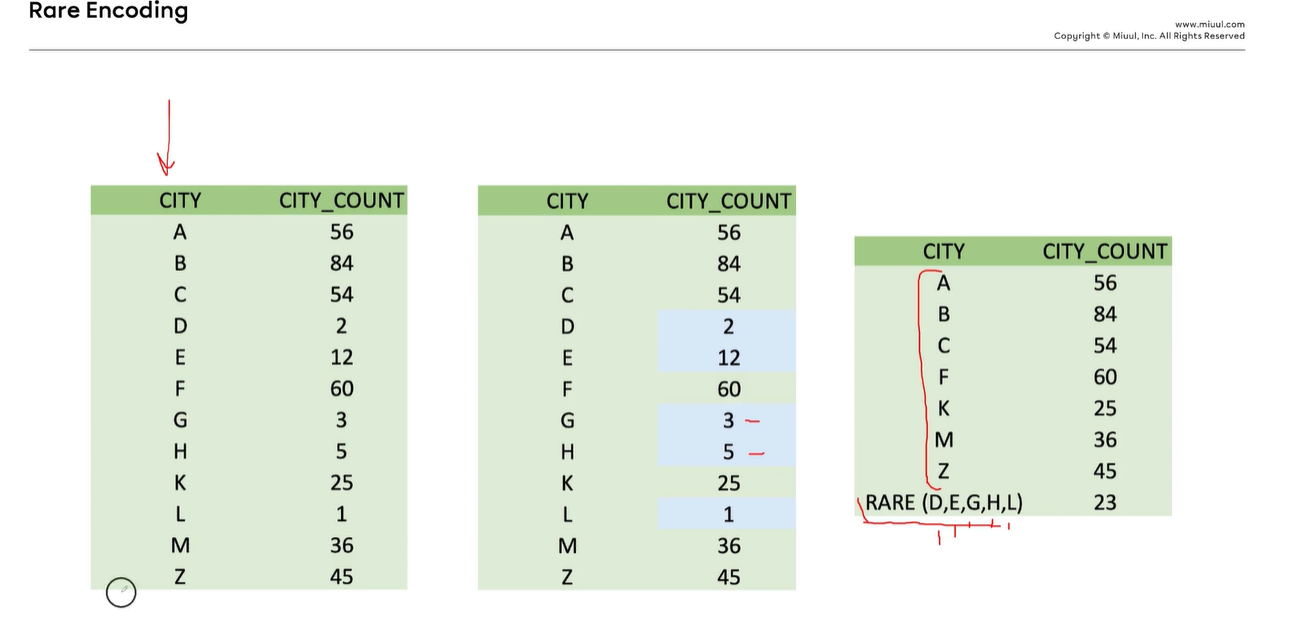

In [ ]:
# 1- Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
# 2- Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
# 3- Rare Encoder yazacağız.

In [ ]:
df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,218391
Higher education,74863
Incomplete higher,10277
Lower secondary,3816
Academic degree,164


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: : 54
num_cols: : 67
cat_but_car: : 1
num_but_cat: : 39


In [ ]:
# cat_summary fonksiyonunun çağrılması
def cat_summary(dataframe, col_name: str, plot=False):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary_df)
    print("##########################################")
    if plot == True:
      sns.countplot(x=dataframe[col_name], data=dataframe)
      plt.show(block=True)

In [ ]:
for col in cat_cols:
  cat_summary(df, col)

                    NAME_CONTRACT_TYPE  Ratio
NAME_CONTRACT_TYPE                           
Cash loans                      278232 90.479
Revolving loans                  29279  9.521
##########################################
             CODE_GENDER  Ratio
CODE_GENDER                    
F                 202448 65.834
M                 105059 34.164
XNA                    4  0.001
##########################################
              FLAG_OWN_CAR  Ratio
FLAG_OWN_CAR                     
N                   202924 65.989
Y                   104587 34.011
##########################################
                 FLAG_OWN_REALTY  Ratio
FLAG_OWN_REALTY                        
Y                         213312 69.367
N                          94199 30.633
##########################################
                 NAME_TYPE_SUITE  Ratio
NAME_TYPE_SUITE                        
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            1

In [ ]:
# Bağımlı değişkenle ilişkinin analiz edilmesi.
df["NAME_INCOME_TYPE"].value_counts()

,count
NAME_INCOME_TYPE,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [ ]:
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

,TARGET
NAME_INCOME_TYPE,
Businessman,0.000
Commercial associate,0.075
Maternity leave,0.400
Pensioner,0.054
State servant,0.058
Student,0.000
Unemployed,0.364
Working,0.096


In [ ]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "RATIO": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [ ]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                     COUNT  RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                            
Cash loans          278232  0.905        0.083
Revolving loans      29279  0.095        0.055


CODE_GENDER : 3
              COUNT  RATIO  TARGET_MEAN
CODE_GENDER                            
F            202448  0.658        0.070
M            105059  0.342        0.101
XNA               4  0.000        0.000


FLAG_OWN_CAR : 2
               COUNT  RATIO  TARGET_MEAN
FLAG_OWN_CAR                            
N             202924  0.660        0.085
Y             104587  0.340        0.072


FLAG_OWN_REALTY : 2
                  COUNT  RATIO  TARGET_MEAN
FLAG_OWN_REALTY                            
N                 94199  0.306        0.083
Y                213312  0.694        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
NAME_TYPE_SUITE                            
Children           3267  0.011        0.074
Family            40149  0.131      

In [ ]:
# Rare Encoder'ın yazılması
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()

  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O"
                  and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])

  return temp_df

In [ ]:
new_df = rare_encoder(df, 0.01)

In [ ]:
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                     COUNT  RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                            
Cash loans          278232  0.905        0.083
Revolving loans      29279  0.095        0.055


CODE_GENDER : 3
              COUNT  RATIO  TARGET_MEAN
CODE_GENDER                            
F            202448  0.658        0.070
M            105059  0.342        0.101
Rare              4  0.000        0.000


FLAG_OWN_CAR : 2
               COUNT  RATIO  TARGET_MEAN
FLAG_OWN_CAR                            
N             202924  0.660        0.085
Y             104587  0.340        0.072


FLAG_OWN_REALTY : 2
                  COUNT  RATIO  TARGET_MEAN
FLAG_OWN_REALTY                            
N                 94199  0.306        0.083
Y                213312  0.694        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
NAME_TYPE_SUITE                            
Children           3267  0.011        0.074
Family            40149  0.131      

In [ ]:
new_df["OCCUPATION_TYPE"].value_counts()

,count
OCCUPATION_TYPE,
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Rare,9238
Medicine staff,8537


**Feature Scaling (Özellik Ölçeklendirme)**

Bizim özellik ölçeklendirmedeki amaçlarımızdan birisi değişkenler arasındaki ölçüm farklılığını gidermektir. Kullanılacak olan modellerin değişkenlere eşit şartlar altında yaklaşmasını sağlamaktır.

Tüm değişkenleri eşit şartlar altında değerlendirebilmek adına ölçeklendirmedir.

Modeller sadece sayılardan anlıyor olduğundan dolayı buradaki büyüklük küçüklük algısının birbirine benzer ama kendi içindeki dağılımlarını koruyor olarak sağlanması gerekir.

Scale edilmiş feature'lar söz konusu olduğunda bu ölçeklendirilmiş feature'ların üreteceği error'ların boyutları (hataların boyutları) ve bunların iteratif olarak azaltılması çabası değişkenler standart olduğunda daha hızlı olmaktadır. (Gradient Descent kullanılan algoritmalarda özellikler ölçeklendirildiyse işlem daha hızlı olmaktadır. (train, test işlemleri))

Bir standartlaştırma işlemidir. Temel amaçlar:
- Eşit şartlarda yaklaşmak
- Eğitim süresini hızlandırmak
- Uzaklık temelli yöntemlerde yanlılığın önüne geçmek

In [ ]:
#####################
# StandardScaler: Klasik standartlaştırma, ortalamayı çıkar, standart sapmaya böl z = (x - u) / s
#####################
df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


In [ ]:
#####################
# RobustScaler: Medyanı çıkar, iqr'a böl.
#####################
# Robust Scaler, Standard Scaler'a göre aykırı değerlere daha dayanıklıdır.
rs = RobustScaler()
df["Age_robust_scaler"] = rs.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robust_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392


In [ ]:
#####################
# MinMaxScaler: Verilen iki değer arasında değişken dönüşümü
#####################
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]], [0,1])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robust_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


In [ ]:
# num_summary fonksiyonunun çağırılması
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
  if plot==True:
    #sns.histplot(data=dataframe, x=dataframe[numerical_col])
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


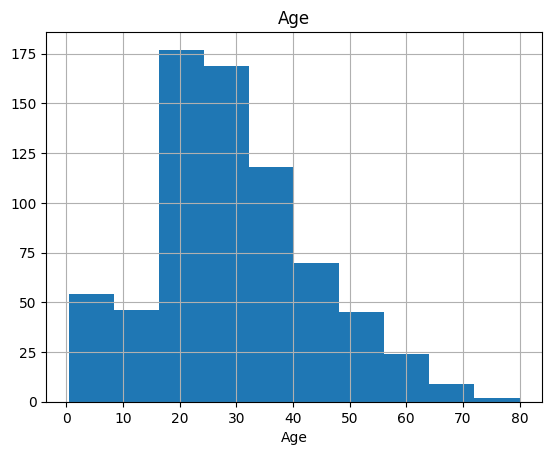

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


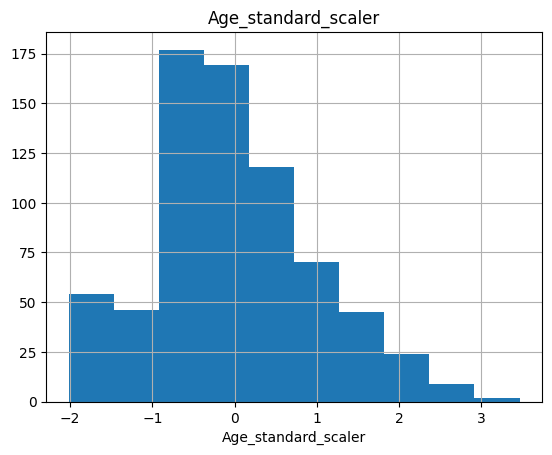

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robust_scaler, dtype: float64


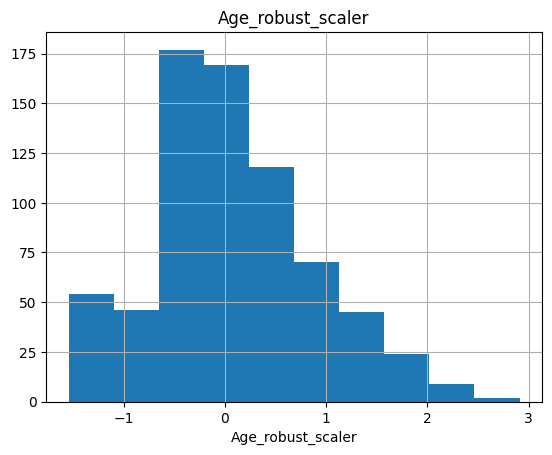

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


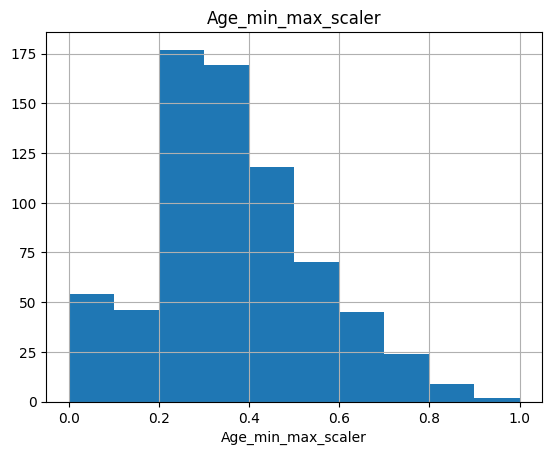

In [ ]:
age_cols = [col for col in df.columns if "Age" in col]
for col in age_cols:
  num_summary(df, col, plot=True)

Yapılarını koruyacak şekilde ifade ediliş tarzlarını değiştirdik. 0-1 arasına ölçeklendirince bilgiyi bozmamış olduk çünkü dağılımda ve yapıda bir değişiklik yapmadık sadece ifade ediliş tarzını değiştirmiş olduk. Taşıdığı bilgi duruyor.

In [ ]:
#####################
# Numeric to Categorical: Sayısal değişkenleri kategorik değişkenlere çevirme
# Binning
#####################
df["Age_qcut"] = pd.qcut(df["Age"], 5)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robust_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435,"(31.8, 41.0]"


# **Feature Extraction (Özellik Çıkarımı)**

Ham veriden değişken, özellik, feature türetmek demek. Ham veriden değişken türetmek iki kapsamda düşünülebilir.

- Yapısal verilerden değişkenler türetmek.
- Yapısal olmayan verilerden değişkenler türetmek.

Yapısal verilerden değişken türetmek dediğimiz elimizde zaten belirli bir yapıda olan mevcut değişkenler üzerinden veri türetmek, değişken türetmek. Diğeri ise yapısal olmayan görüntü, ses, yazı gibi verilerden özellik üretmek.

***Neden böyle özellikler üretmek istiyoruz?***

Numerik veriler üzerinde çalışabiliyoruz. Tabular data dediğimiz Excel tarzındaki verilerin üzerine çalışıyoruz ama elimizde bir resim olduğunda, bir yazı olduğunda, bir ses olduğunda bazı öğrenme algoritmalarını kullanmak için bu yapısal olmayan şeyleri matematiksel şekilde anlaşılabilecek şeylere, yani numerik temsillere dönüştürmemiz gerekir. Bundan dolayı yapısal olmayanları da dönüştürmek ve bunlardan özellik çıkarma işlemiyle ilgileniyoruz.

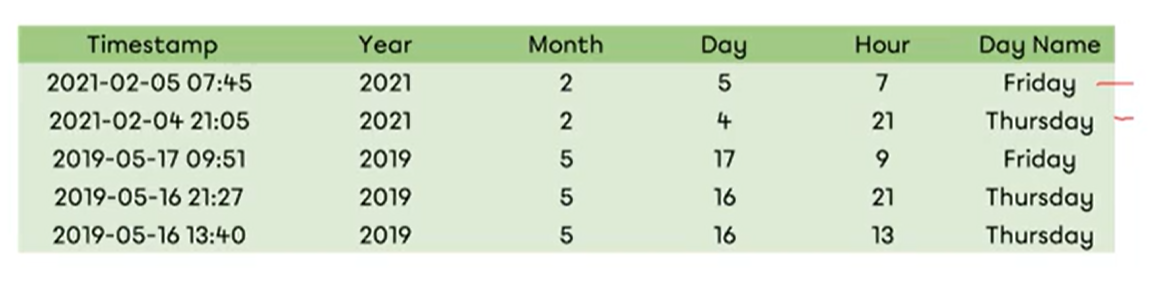

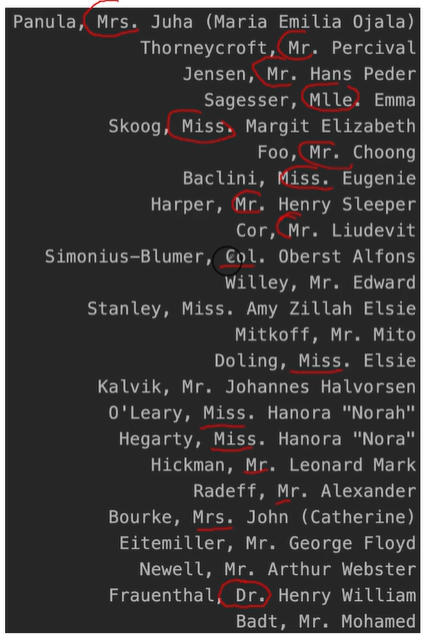

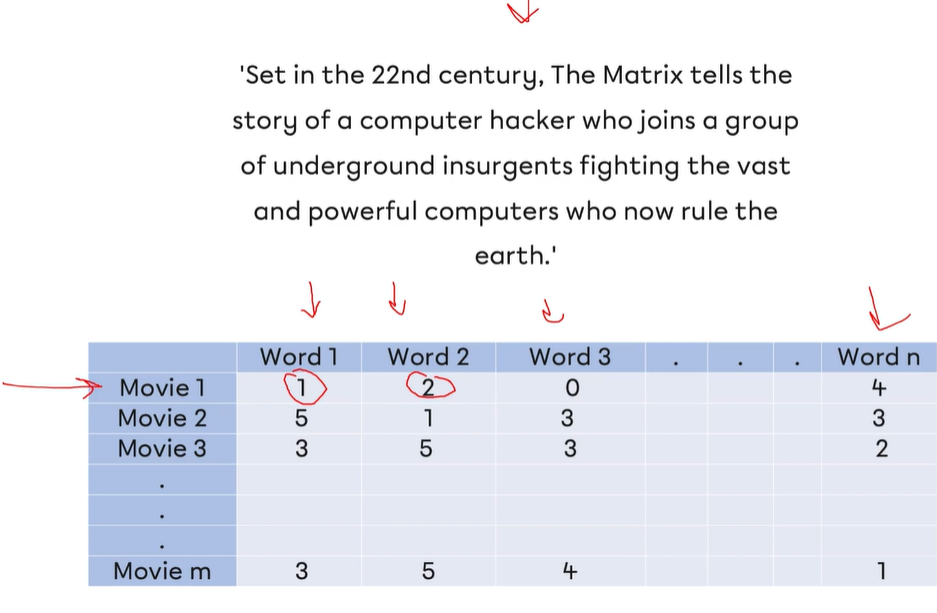

Örneğin titanic veri setindeki isim değişkeni kardinal olmasına rağmen Mr. Miss. Dr. gibi unvan ifadeleri bize meslek, cinsiyet ve evlilik durumu gibi bilgilere ulaşmamızı sağlayabilir. Bunlara sahip olan gözlemlerin hedef değişkenle ilişkisi incelenerek bir özellik çıkarımı yapılabilir.

Diğer bir örnekte ise yapısal olmayan film açıklaması yazısını doğal dil işleme teknikleriyle veya matematiksel vektör gösterimi ile bilgisayarın anlayabileceği bir veri formatına dönüştürebiliriz. Matematiksel temsil ihtiyacımız vardır.

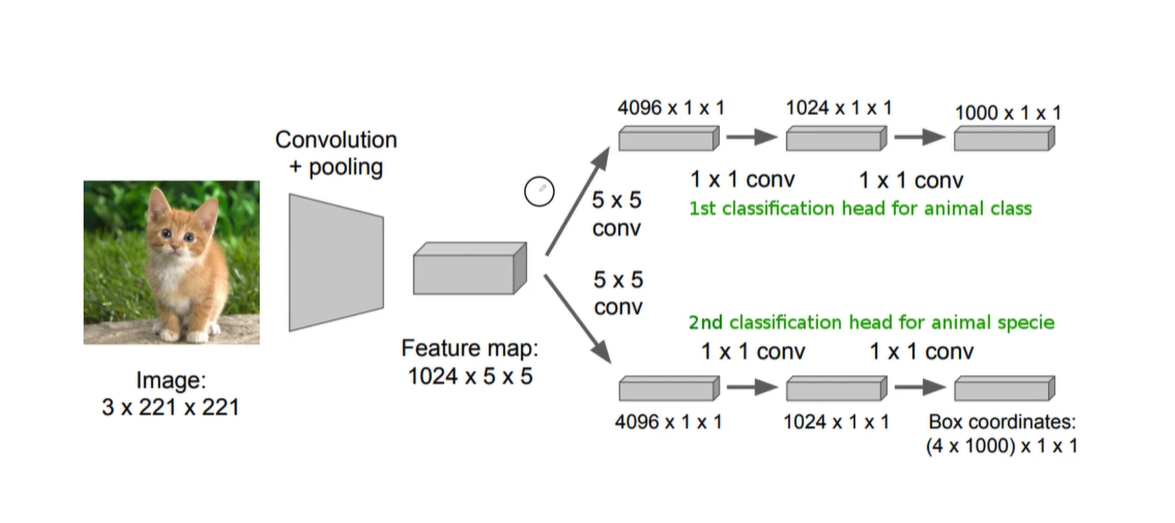

Yapısal veri olmayan bir resim formunu da matematiksel olarak ifade edebilmek için bazı tekniklerle, örneğin resmi parçalara bölerek belirli bölgelerdeki piksel yoğunluğu ve renk dağılımlarını göz önünde bulundurarak örneğin kulak, arkaplan, yüz gibi featurelar türetilerek matematiksel olarak temsil edilebilir.

In [ ]:
##########################################
# Binary Features: Flag, Bool, True-False
##########################################

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype("int") # Boş değil mi sorgusu yaptı ve boş olmayanlara true, boş olanlara false dedi
# ve true-false ları integer'a dönüştürerek 1-0'lara çevirdi.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0


In [ ]:
df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})

,Survived
NEW_CABIN_BOOL,
0,0.300
1,0.667


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


2 parametre var.

1- Başarı sayısı,

2- Gözlem sayısı.

Proportions z testinin hipotezi şu şekildedir; P1 ve P2 oranları arasında fark yoktur.
P1 ve P2 oranları kabin numarası olan ve olmayanların hayatta kalma durumunu ifade ediyor. İkisi arasında fark yoktur diyen H0 hipotezi, p value değeri 0.05'ten küçük olduğundan dolayı reddedilir yani aralarında istatistiki olarak anlamlı bir farklılık var gibi gözüküyor.

> Süper bir noktadayız, bir değişken türettik ve bu değişken benim için anlamlı olabilir mi, olmaz mı bilmiyorum. Modelleme yapmadan bunu tam anlamıyla göremem. Dikkat! Ama bana bir fikir vermesi açısından "bu oranlar, frekanslar da bunu dağılımı da göz önünde bulundurulduğunda acaba birbirinden farklı mıdır?" sorusunu sordum ve "farklıdır." yanıtı geldi. Dikkat! İki kere dikkat! Çok değişkenli etkiyi bilmiyorum. 2 tane değişkenin sanki sadece ikisi birlikte oluşmuş gibi değerlendirerek inceledim ama bu yapılar tek başına oluşmadı ki yani survived değişkeninin ortaya çıkışı burada ele aldığımız "NEW_CABIN_BOOL" değişkeni ile ortaya çıkmadı ki ama çıkmış olabilir bilmiyorum ve şu andaki kanaatim de çıkmış olabileceğine yönelik ama bilmiyorum.

> Ben bu değişkenleri birlikte modele soktuğumda bu çok değişkenli etkiyi gözlemleme imkanım olacak. O durumda bu değişkenin anlamlı olup olmadığını daha iyi değerlendiriyor olacağım, NEW_CABIN_BOOL değişkeni. Ama şuan da ilerlemek ya da bu değişkeni kabul edip etmemek için bir fikir edinmeye çalıştığımda yeterli ispatı, yeterli delili buldum, süper. Bu değişken artık cepte.



In [ ]:
df.loc[(df["SibSp"] + df["Parch"]) > 0, "NEW_IS_ALONE"] = "NO"
df.loc[(df["SibSp"] + df["Parch"]) == 0, "NEW_IS_ALONE"] = "YES"

In [ ]:
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})

,Survived
NEW_IS_ALONE,
NO,0.506
YES,0.304


In [ ]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                            df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = -6.0704, p-value = 0.0000


Bu mutlak olarak hayatta kalma durumunu bu değişkenin etkilediğini göstermez ama bu değişkenin göz ardı edilemeyeceğini gösterir.

Bir model kurulduğunda oradaki etki orada daha net gözüküyor olacaktır.

In [ ]:
##########################################
# Text'ler Üzerinden Özellik Türetmek
##########################################

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
#####################
# Letter Count
#####################

df["NEW_NAME_COUNT"] = df["Name"].str.len()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24


In [ ]:
#####################
# Word Count
#####################

df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4


In [ ]:
#####################
# Özel Yapıları Yakalamak
#####################

df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

df.groupby("NEW_NAME_DR").agg({"Survived": ["mean", "count"]})

# Kayda değer durum! Doktor olanların hayatta kalma durumu daha yüksek.

Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

In [ ]:
#####################
# Regex ile Değişken Türetmek
#####################

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4,0


In [ ]:
df["NEW_TITLE"] = df.Name.str.extract(" ([A-Za-z]+)\.", expand=False)

In [ ]:
df[["NEW_TITLE", "Survived", "Age"]].groupby("NEW_TITLE").agg({"Survived": "mean", "Age": ["count","mean"]})

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

In [ ]:
##########################################
# Date Değişkenleri Üretmek
##########################################

dff = pd.read_csv("course_reviews.csv")
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [ ]:
dff["Timestamp"] = pd.to_datetime(dff["Timestamp"])
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [ ]:
# year
dff["year"] = dff["Timestamp"].dt.year
# month
dff["month"] = dff["Timestamp"].dt.month
# year diff
dff["year_diff"] = date.today().year - dff["Timestamp"].dt.year
# month diff (iki tarih arasındaki ay farkı): yıl farkı + ay farkı
dff["month_diff"] = (date.today().year - dff["Timestamp"].dt.year) * 12 + date.today().month - dff["Timestamp"].dt.month
# day name
dff["day_name"] = dff["Timestamp"].dt.day_name()

In [ ]:
dff.head()
# date

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff,day_name
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,3,44,Friday
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,3,44,Thursday
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,3,44,Thursday
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,3,44,Thursday
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,3,44,Thursday


In [ ]:
##########################################
# Feature Interactions (Özellik Etkileşimleri)
##########################################
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]

df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1

# male
df.loc[(df["Sex"] == "male") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngmale"

df.loc[(df["Sex"] == "male") & (df["Age"] > 21) & (df["Age"] <= 50), "NEW_SEX_CAT"] = "maturemale"

df.loc[(df["Sex"] == "male") & (df["Age"] > 50), "NEW_SEX_CAT"] = "seniormale"
# female
df.loc[(df["Sex"] == "female") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngfemale"

df.loc[(df["Sex"] == "female") & (df["Age"] > 21) & (df["Age"] <= 50), "NEW_SEX_CAT"] = "maturefemale"

df.loc[(df["Sex"] == "female") & (df["Age"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,66.000,2,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,38.000,2,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,78.000,1,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,35.000,2,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,105.000,1,maturemale


In [ ]:
df.groupby("NEW_SEX_CAT")["Survived"].mean()

,Survived
NEW_SEX_CAT,
maturefemale,0.775
maturemale,0.199
seniorfemale,0.941
seniormale,0.128
youngfemale,0.679
youngmale,0.250


# **UYGULAMA**

In [ ]:
##########################################
# Titanic Uçtan Uca Feature Engineering & Data Preprocessing
##########################################

df = load()
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df.columns = [col.upper() for col in df.columns] # Değişken isimlerini büyüttük.

In [ ]:
##########################################
# 1. Feature Engineering (Değişken Mühendisliği)
##########################################

# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype("int")
# Name Count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df["NEW_TITLE"] = df.NAME.str.extract(" ([A-Za-z]+)\.", expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[(df["SIBSP"] + df["PARCH"]) > 0, "NEW_IS_ALONE"] = "NO"
df.loc[(df["SIBSP"] + df["PARCH"]) == 0, "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[((df["AGE"] >= 18) & (df["AGE"] < 56)), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"
# sex x age
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [ ]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,51,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [ ]:
df.shape

(891, 22)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 22
cat_cols: : 14
num_cols: : 5
cat_but_car: : 3
num_but_cat: : 8


In [ ]:
cat_cols

['SEX',
 'EMBARKED',
 'NEW_TITLE',
 'NEW_IS_ALONE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'SURVIVED',
 'PCLASS',
 'SIBSP',
 'PARCH',
 'NEW_CABIN_BOOL',
 'NEW_NAME_WORD_COUNT',
 'NEW_NAME_DR',
 'NEW_FAMILY_SIZE']

In [ ]:
num_cols

['PASSENGERID', 'AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [ ]:
cat_but_car

['NAME', 'TICKET', 'CABIN']

In [ ]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [ ]:
##########################################
# 2. Outliers (Aykırı Değerler)
##########################################

for col in num_cols:
  print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [ ]:
for col in num_cols:
  replace_with_thresholds(df, col)

In [ ]:
for col in num_cols:
  print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [ ]:
##########################################
# 3. Missing Values (Eksik Değerler)
##########################################

missing_values_table(df)

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [ ]:
df.drop("CABIN", inplace=True, axis=1) # Kabin değişkenini CABIN_BOOL'a aktardığımız için CABIN değişkenini uçurduk. (sildik)

In [ ]:
remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

In [ ]:
# Name üzerinden yeni değişkenler türettiğim için NAME değişkeninine ihtiyacım kalmadı ve sildim.
# Ticket değişkeni de kardinal bir değişken ve bir bilgi taşımadığı için sildim.
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [ ]:
# Title'lara göre yaş değişkeninin eksik değerlerini o kırılımdaki medyan değerleri ile doldurduk.
missing_values_table(df)

                n_miss  ratio
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [ ]:
# AGE değişkeninden türetilen değişkenleri tekrar üretmemiz lazım ki eksiklikler gitsin.
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# age level
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[((df["AGE"] >= 18) & (df["AGE"] < 56)), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"
# sex x age
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [ ]:
missing_values_table(df)

          n_miss  ratio
EMBARKED       2  0.220


In [ ]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [ ]:
"""
Kategorik olan ve eşsiz sınıf değeri 10'dan az olan değişkenlerin boşluklarını o değişkenin sınıflarından en çok tekrar eden (mod) ile doldur.
"""
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
##########################################
# 4. Label Encoding
##########################################
binary_cols = [col for col in df.columns if df[col].dtype not in [int,float] and (df[col].nunique() == 2)]
binary_cols

['SEX', 'NEW_IS_ALONE']

In [ ]:
for col in binary_cols:
  df = label_encoder(df, col)

In [ ]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,1,22.000,1,0,7.250,S,0,23,4,0,Mr,2,66.000,0,mature,maturemale
1,2,1,1,0,38.000,1,0,65.634,C,1,45,7,0,Mrs,2,38.000,0,mature,maturefemale
2,3,1,3,0,26.000,0,0,7.925,S,0,22,3,0,Miss,1,78.000,1,mature,maturefemale
3,4,1,1,0,35.000,1,0,53.100,S,1,44,7,0,Mrs,2,35.000,0,mature,maturefemale
4,5,0,3,1,35.000,0,0,8.050,S,0,24,4,0,Mr,1,105.000,1,mature,maturemale


In [ ]:
##########################################
# 5. Rare Encoding
##########################################
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
     COUNT  RATIO  TARGET_MEAN
SEX                           
0      314  0.352        0.742
1      577  0.648        0.189


EMBARKED : 3
          COUNT  RATIO  TARGET_MEAN
EMBARKED                           
C           168  0.189        0.554
Q            77  0.086        0.390
S           646  0.725        0.339


NEW_TITLE : 17
           COUNT  RATIO  TARGET_MEAN
NEW_TITLE                           
Capt           1  0.001        0.000
Col            2  0.002        0.500
Countess       1  0.001        1.000
Don            1  0.001        0.000
Dr             7  0.008        0.429
Jonkheer       1  0.001        0.000
Lady           1  0.001        1.000
Major          2  0.002        0.500
Master        40  0.045        0.575
Miss         182  0.204        0.698
Mlle           2  0.002        1.000
Mme            1  0.001        1.000
Mr           517  0.580        0.157
Mrs          125  0.140        0.792
Ms             1  0.001        1.000
Rev            6  0.007    

In [ ]:
df = rare_encoder(df, 0.01)
df["NEW_TITLE"].value_counts()

,count
NEW_TITLE,
Mr,517
Miss,182
Mrs,125
Master,40
Rare,27


In [ ]:
##########################################
# 6. One Hot Encoding
##########################################
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['PCLASS',
 'SIBSP',
 'PARCH',
 'EMBARKED',
 'NEW_NAME_WORD_COUNT',
 'NEW_TITLE',
 'NEW_FAMILY_SIZE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT']

In [ ]:
df = one_hot_encoder(df, ohe_cols)

In [ ]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,38.000,65.634,1,45,0,38.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.000,7.925,0,22,0,78.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.000,53.100,1,44,0,35.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,35.000,8.050,0,24,0,105.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 52
cat_cols: : 47
num_cols: : 5
cat_but_car: : 0
num_but_cat: : 47


In [ ]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [ ]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
          COUNT  RATIO  TARGET_MEAN
SURVIVED                           
0           549  0.616        0.000
1           342  0.384        1.000


SEX : 2
     COUNT  RATIO  TARGET_MEAN
SEX                           
0      314  0.352        0.742
1      577  0.648        0.189


NEW_CABIN_BOOL : 2
                COUNT  RATIO  TARGET_MEAN
NEW_CABIN_BOOL                           
0                 687  0.771        0.300
1                 204  0.229        0.667


NEW_NAME_DR : 2
             COUNT  RATIO  TARGET_MEAN
NEW_NAME_DR                           
0              881  0.989        0.383
1               10  0.011        0.500


NEW_IS_ALONE : 2
              COUNT  RATIO  TARGET_MEAN
NEW_IS_ALONE                           
0               354  0.397        0.506
1               537  0.603        0.304


PCLASS_2 : 2
          COUNT  RATIO  TARGET_MEAN
PCLASS_2                           
0           707  0.793        0.361
1           184  0.207        0.473


PCLASS

In [ ]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

useless_cols

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [ ]:
# df.drop(useless_cols, axis=1, inplace=True)

In [ ]:
##########################################
# 7. Standard Scaler
##########################################

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.561,-0.821,-0.437,0.066
1,0.663,2.032,2.248,-0.790
2,-0.255,-0.788,-0.559,0.434
3,0.434,1.419,2.126,-0.882
4,0.434,-0.781,-0.315,1.260


In [ ]:
df.shape

(891, 52)

In [ ]:
##########################################
# 8. Model
##########################################

y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test) # Doğruluk oranı

0.8059701492537313

In [ ]:
##########################################
# Hiç bir işlem yapılmadan elde edilecek skor?
##########################################

In [ ]:
dff = load()
dff.dropna(inplace=True)
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
y = dff["Survived"]
X = dff.drop(["Survived", "PassengerId", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7090909090909091

In [ ]:
# Yeni ürettiğimiz değişkenler ne alemde?

def plot_importance(model, features, num=len(X), save=False):
  feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
  plt.figure(figsize=(10,10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")

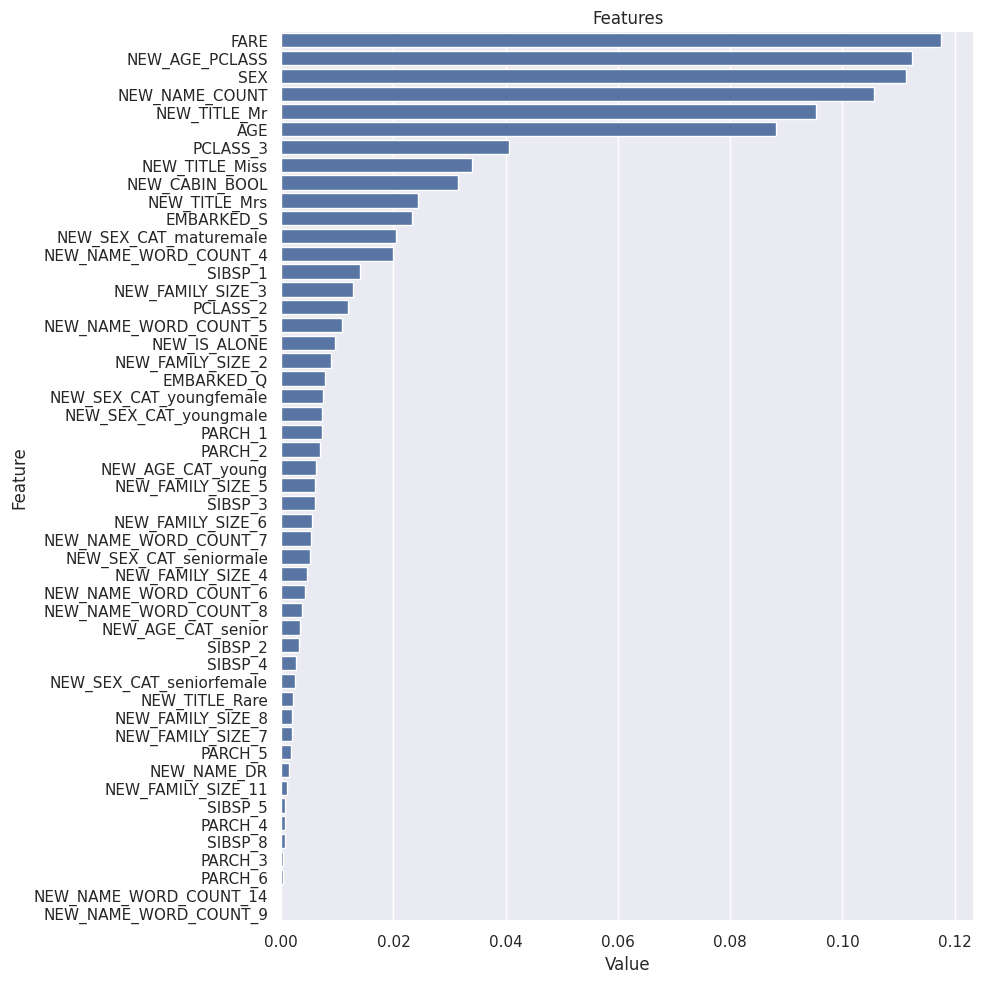

In [ ]:
plot_importance(rf_model, X_train)